length of set : 41
Mean squared error of ransac regression: 0.20
Variance score of ransac: -20.59
Mean squared error of polynomial with deg 4: 0.20
Variance score of polynomial with deg 4: -20.33
Mean squared error of polynomial with deg 5: 0.20
Variance score of polynomial with deg 5: -21.18
Mean squared error of ransac regression: 0.01
Variance score of ransac: 0.08
Mean squared error of polynomial with deg 4: 0.04
Variance score of polynomial with deg 4: -2.69
Mean squared error of polynomial with deg 5: 0.04
Variance score of polynomial with deg 5: -2.82
Mean squared error of ransac regression: 0.02
Variance score of ransac: -2.37
Mean squared error of polynomial with deg 4: 0.14
Variance score of polynomial with deg 4: -19.24
Mean squared error of polynomial with deg 5: 0.14
Variance score of polynomial with deg 5: -18.99
Mean squared error of ransac regression: 0.08
Variance score of ransac: -1.76
Mean squared error of polynomial with deg 4: 0.04
Variance score of polynomial with

Mean squared error of ransac regression: 0.48
Variance score of ransac: -123.22
Mean squared error of polynomial with deg 4: 0.79
Variance score of polynomial with deg 4: -202.11
Mean squared error of polynomial with deg 5: 1.92
Variance score of polynomial with deg 5: -493.90
Mean squared error of ransac regression: 5248.17
Variance score of ransac: -3.01
Mean squared error of polynomial with deg 4: 4916.00
Variance score of polynomial with deg 4: -2.76
Mean squared error of polynomial with deg 5: 4805.30
Variance score of polynomial with deg 5: -2.67
Mean squared error of ransac regression: 5065.47
Variance score of ransac: -8.15
Mean squared error of polynomial with deg 4: 4599.63
Variance score of polynomial with deg 4: -7.31
Mean squared error of polynomial with deg 5: 4324.33
Variance score of polynomial with deg 5: -6.81
Mean squared error of ransac regression: 0.01
Variance score of ransac: -0.14
Mean squared error of polynomial with deg 4: 8.25
Variance score of polynomial wit

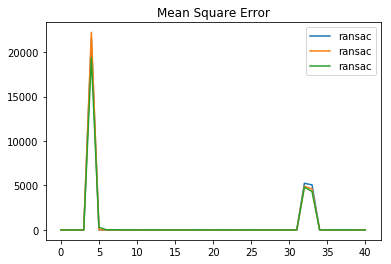

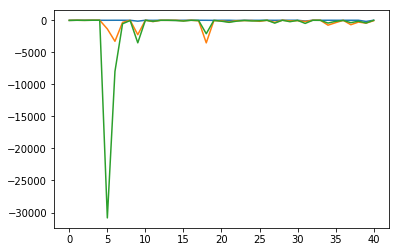

In [8]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
spreadsheet = pd.ExcelFile('Dataset/dataset.xlsx')
df2 = spreadsheet.parse('Sheet1')

crops_combo=[]
crop_season=[]
for row in df2.itertuples():
    crop_season.append(str(row[5]).strip())
    crop_season.append(str(row[4]).strip())
    crops_combo.append(crop_season)
    crop_season=[]
a = set(tuple(i) for i in crops_combo)
print('length of set :',len(a))


ar = []
ar2d = []
x_list=[]
z_list=[]
i=0
y_list=[]
ransac_mse = []
poly4_mse = []
poly5_mse = []
ransac_var = []
poly4_var = []
poly5_var = []
count1 = []
i1 = 0
count2 = []
i2 = 0
count3 = []
i3 = 0
model_list = []
for l in sorted(a):
    for row in df2.itertuples():
        if str(row[5]).strip()==l[0] and str(row[4]).strip()==l[1]:
            ar.append(row[8])
            x_list.append(row[8])
            ar.append(row[9])
            z_list.append(row[9])
            y_list.append(row[10])
            ar2d.append(ar)
            ar = []
    if len(ar2d) < 10:
        continue
    count2.append(i2)
    i2 = i2+1
    nar2d = np.array(ar2d)
    nar2d = np.nan_to_num(nar2d)
    ny = np.array(y_list)
    ny = np.nan_to_num(ny)
    
    X_train = nar2d[:-4]
    X_test = nar2d[-4:]

    y_train = ny[:-4]
    y_test = ny[-4:]
    
    
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor()
    ransac.fit(X_train, y_train)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    line_y_ransac = ransac.predict(X_test)
    ransac = mean_squared_error(y_test, line_y_ransac)
    ransac_mse.append(ransac)
    print("Mean squared error of ransac regression: %.2f"
          % mean_squared_error(y_test, line_y_ransac))
    ransac = r2_score(y_test, line_y_ransac)
    print('Variance score of ransac: %.2f' % r2_score(y_test, line_y_ransac))
    ransac_var.append(ransac)
    
    #Fit polynomial features with degree 4
    poly = PolynomialFeatures(degree = 4) 
    X_poly = poly.fit_transform(X_train) 
    line = poly.fit(X_poly, y_train) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y_train) 
    line_y_predicted = lin2.predict(poly.fit_transform(X_test))
    polyMetrics = mean_squared_error(y_test, line_y_predicted)
    poly4_mse.append(polyMetrics)
    print("Mean squared error of polynomial with deg 4: %.2f"
          % mean_squared_error(y_test, line_y_predicted))
    polyMetrics = r2_score(y_test, line_y_predicted)
    poly4_var.append(polyMetrics)
    print('Variance score of polynomial with deg 4: %.2f' % r2_score(y_test, line_y_predicted))
    
    #Fit polynomial features with degree 5
    poly = PolynomialFeatures(degree = 5) 
    X_poly = poly.fit_transform(X_train) 
    line = poly.fit(X_poly, y_train) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y_train) 
    line_y_predicted = lin2.predict(poly.fit_transform(X_test))
    polyMetrics = mean_squared_error(y_test, line_y_predicted)
    poly5_mse.append(polyMetrics)
    print("Mean squared error of polynomial with deg 5: %.2f"
          % mean_squared_error(y_test, line_y_predicted))
    polyMetrics = r2_score(y_test, line_y_predicted)
    poly5_var.append(polyMetrics)
    print('Variance score of polynomial with deg 5: %.2f' % r2_score(y_test, line_y_predicted))
    
plt.plot(count2, ransac_mse,label='RANSAC')
plt.plot(count2, poly4_mse,label='Degree 4')
plt.plot(count2, poly5_mse,label='Degree 5')
plt.title("Mean Square Error")
plt.legend()
plt.show()

plt.plot(count2, ransac_var, count2, poly4_var, count2, poly5_var)
plt.show()
